# GDP & Life Expectancy Analysis in Six Countries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
!pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
# Data Checking
data=pd.read_csv('all_data.csv')
print(data.head())
print(data.info())
print(data.duplicated().value_counts())
print(data.isnull().sum())


  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
False    96
Name: count, dtype: int64
Country                        

# Basic Data Exploration & Descriptive Statistics

In this section, we compute basic statistical metrics (mean, minimum, maximum, standard deviation) for each column, both overall and by country.


In [45]:
# General statistics for the dataset
print(data.describe())

# Mean and standard deviation of life expectancy per country
print(data.groupby("Country")["Life expectancy at birth (years)"].mean())
print(data.groupby("Country")["Life expectancy at birth (years)"].std())

# Mean GDP per country
print(data.groupby("Country")["GDP"].mean())




              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13
Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: Life expectancy at birth (years), dtype: float64
Country
Chile                       1.058911
China                       1.318016
Germany                     0.

# Visualization of Life Expectancy and GDP Over Time

Here we visualize how life expectancy and GDP evolve over time, both overall and by country.


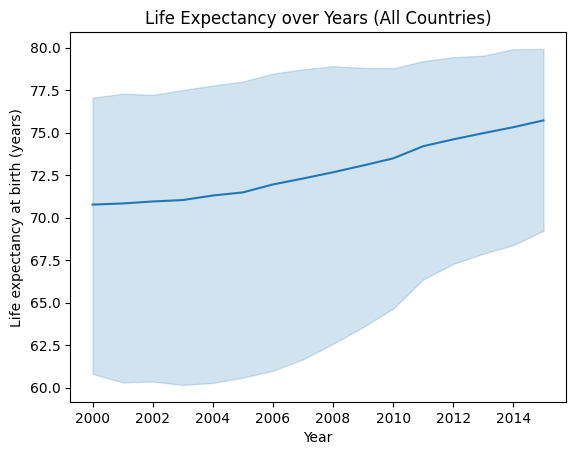

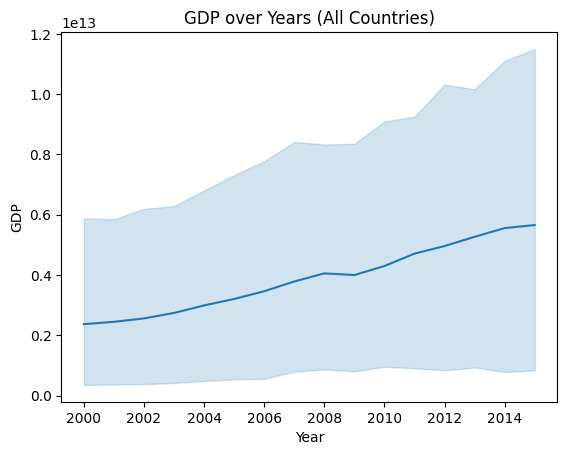

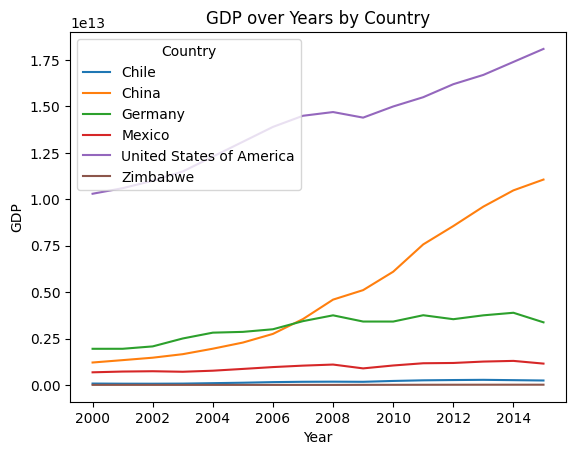

In [46]:
# Life expectancy over time (all countries)
sns.lineplot(data=data, x='Year', y='Life expectancy at birth (years)')
plt.title('Life Expectancy over Years (All Countries)')
plt.show()

# GDP over time (all countries)
sns.lineplot(data=data, x='Year', y='GDP')
plt.title('GDP over Years (All Countries)')
plt.show()

# GDP over time by country
sns.lineplot(data=data, x='Year', y='GDP', hue='Country')
plt.title('GDP over Years by Country')
plt.show()




# GDP vs Life Expectancy: Scatterplots per Country

This section visualizes the relationship between life expectancy at birth and GDP in U.S. dollars for each country in the dataset. Each plot helps identify patterns unique to each country.

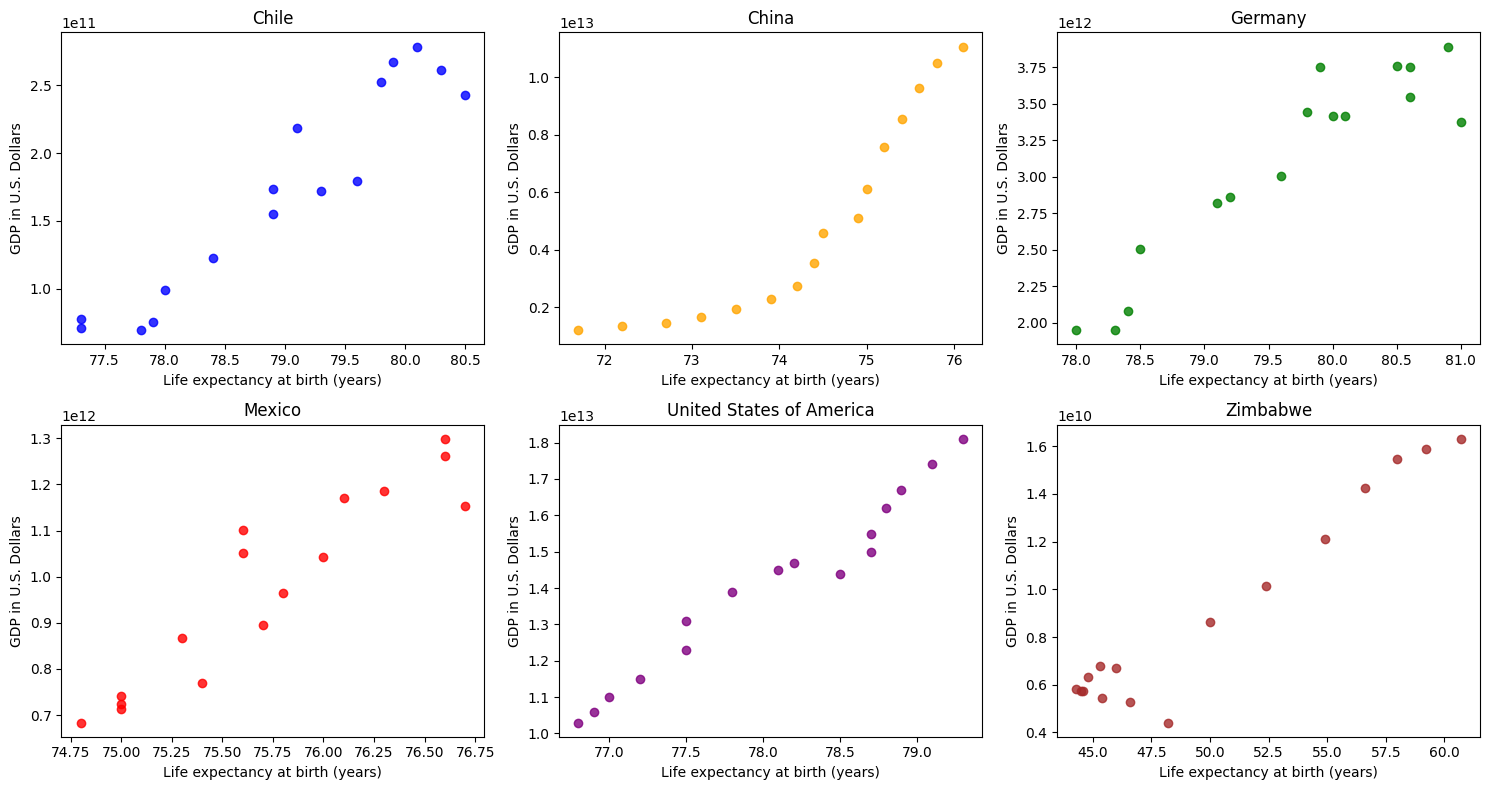

In [47]:
# Iterate through countries and plot a separate scatterplot for each, with individual colors and titles.

plt.figure(figsize=(15, 8))

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']  # adjust length if you have more/less countries
country_names = [
    'Chile', 'China', 'Germany',
    'Mexico', 'United States of America', 'Zimbabwe'
]

for i, country in enumerate(country_names):
    country_data = data[data['Country'] == country]
    plt.subplot(2, 3, i+1)
    plt.scatter(
        x=country_data['Life expectancy at birth (years)'],
        y=country_data['GDP'],
        color=colors[i],
        alpha=0.8
    )
    plt.title(country)
    plt.xlabel('Life expectancy at birth (years)')
    plt.ylabel('GDP in U.S. Dollars')
    # Optional: plt.grid(True)

plt.tight_layout()
plt.show()





# Distribution of Life Expectancy and GDP by Country

Boxplots illustrate the distribution, spread, and potential outliers of Life Expectancy and GDP within each country.
This helps identify variation within countries and compare it across them.



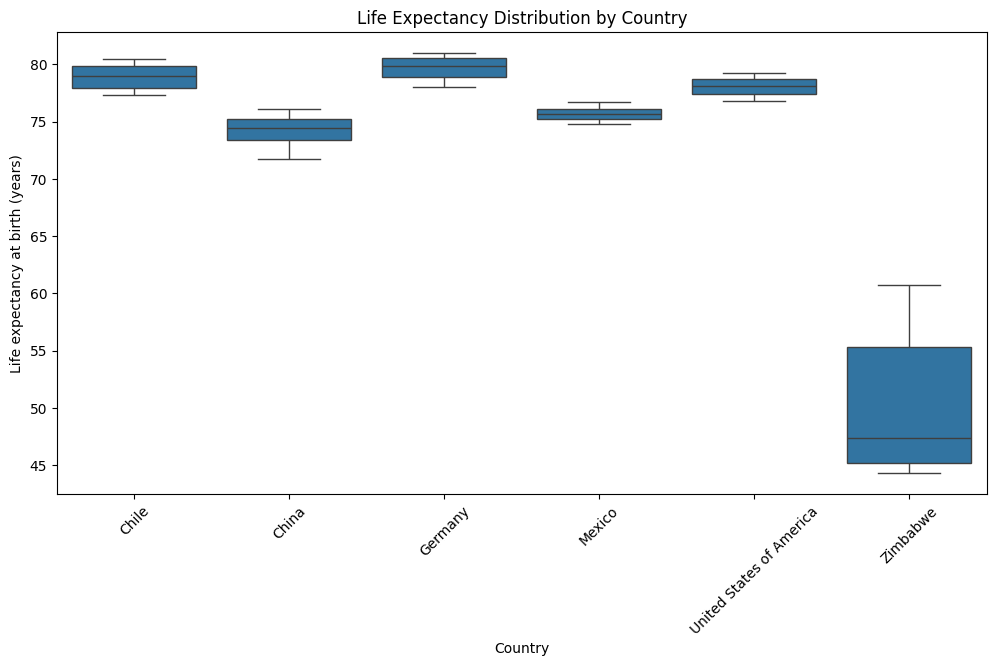

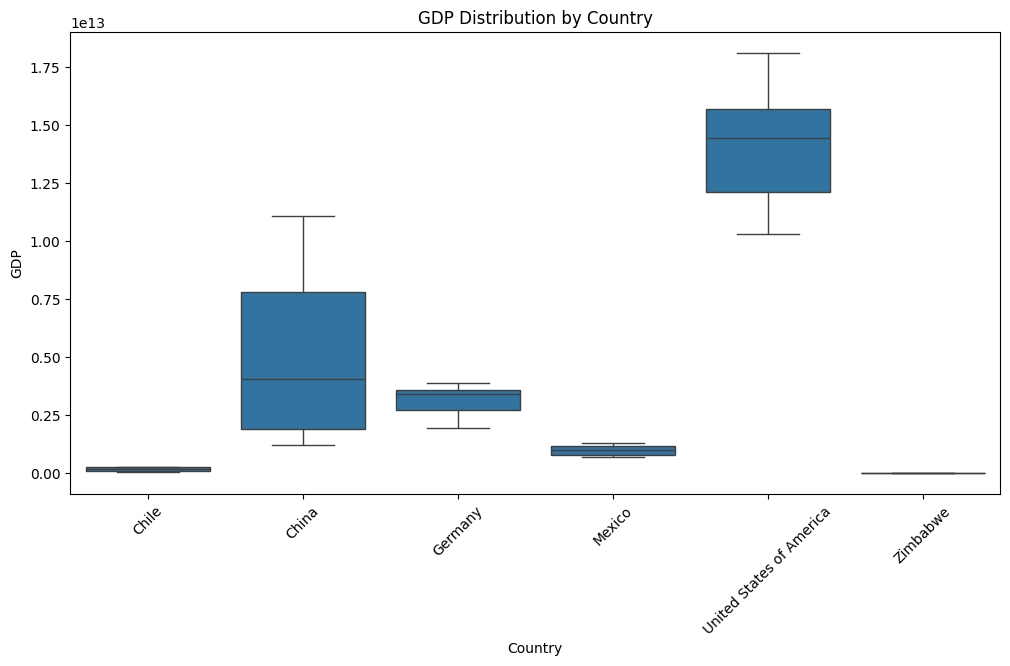

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Life expectancy at birth (years)', data=data)
plt.title('Life Expectancy Distribution by Country')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='GDP', data=data)
plt.title('GDP Distribution by Country')
plt.xticks(rotation=45)
plt.show()


# Correlation Analysis between GDP and Life Expectancy

This section investigates the statistical relationship between a country's GDP and its life expectancy at birth. 

We calculate the Pearson correlation coefficient to quantify the strength and direction of the linear association between these two variables. 

Additionally, we provide a scatterplot visualization to illustrate this relationship graphically. The plot includes a regression line for better interpretability.

Understanding this correlation helps to evaluate how economic factors might influence health outcomes across countries.

Overall Pearson correlation: 0.343
Pearson correlation per country:
Chile: 0.950
China: 0.909
Germany: 0.933
Mexico: 0.932
United States of America: 0.982
Zimbabwe: 0.966


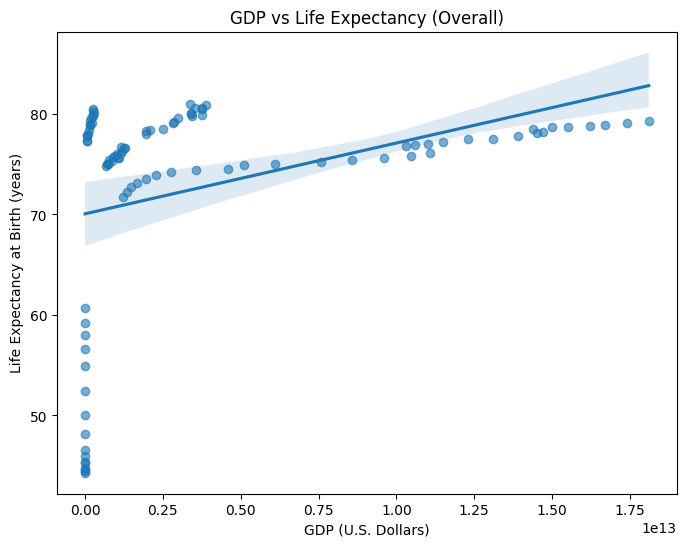

In [49]:
# Overall Pearson correlation
corr_overall = data['GDP'].corr(data['Life expectancy at birth (years)'])
print(f'Overall Pearson correlation: {corr_overall:.3f}')

# Correlation per country with printout
print("Pearson correlation per country:")
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    corr = country_data['GDP'].corr(country_data['Life expectancy at birth (years)'])
    print(f'{country}: {corr:.3f}')

# Scatterplot with regression line for overall data
plt.figure(figsize=(8,6))
sns.regplot(x='GDP', y='Life expectancy at birth (years)', data=data, scatter_kws={'alpha':0.6})
plt.title('GDP vs Life Expectancy (Overall)')
plt.xlabel('GDP (U.S. Dollars)')
plt.ylabel('Life Expectancy at Birth (years)')
plt.show()

# Conclusion

The analysis revealed a consistent, strong positive correlation between GDP and life expectancy within individual countries over time, suggesting that economic growth is closely linked to improvements in health outcomes at the country level.

However, the correlation across all countries together was weaker, reflecting the impact of comparing nations with diverse levels of development and other potential factors such as access to healthcare, education, and policy differences.

Visualization of distributions demonstrated notable differences in both GDP and life expectancy ranges and outliers across nations.

Further analysis could incorporate additional variables (e.g., education, healthcare expenditure) to refine these insights and clarify the mechanisms driving the observed relationships.
